# Introduction

The most familiar linear regression is fitting a straight line to the data <b>y=ax+b</b> where a is the <b>slope</b> and b is the <b>intercept</b>

hθ(x) = θ0 + θ1*x1 + θ2*x2<br/><br/>
where hθ(x) is the hypothesis function<br/>
θ0 is the model parameters<br/>
x is the feature vector<br/>
<br/>
In code, we can represent the vector equation as<br/>
hθ(x)=np.sum(np.dot(θ,x))

# Cost Function

In code you can write cost function as <br/>
J(θ)=1/2(np.sum(np.square(hθ(x) - y)))

# Optimizer(Gradient Descent)

Consider this is as the update for reducing the Cost Function

# What are Mean Squared Error and Root Mean Squared Error?

The Mean Squared Error (MSE) is a measure of how close a fitted line is to data points. For every data point, you take the distance vertically from the point to the corresponding y value on the curve fit (the error), and square the value. Then you add up all those values for all data points, and, in the case of a fit with two parameters such as a linear fit, divide by the number of points minus two.The squaring is done so negative values do not cancel positive values. The smaller the Mean Squared Error, the closer the fit is to the data. The MSE has the units squared of whatever is plotted on the vertical axis.<br/><br/>
Another quantity that we calculate is the Root Mean Squared Error (RMSE). It is just the square root of the mean square error. That is probably the most easily interpreted statistic, since it has the same units as the quantity plotted on the vertical axis.

Key point: The RMSE is thus the distance, on average, of a data point from the fitted line, measured along a vertical line.

The RMSE is directly interpretable in terms of measurement units, and so is a better measure of goodness of fit than a correlation coefficient. One can compare the RMSE to observed variation in measurements of a typical point. The two should be similar for a reasonable fit.

# Normal Equation

θ = (X_Transpose * X)^−1 (X_transpose * y)

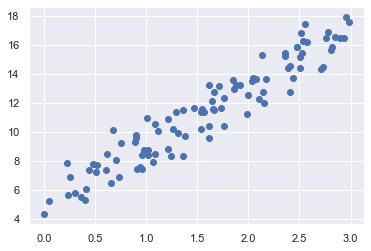

In [14]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
X = 3 * np.random.rand(100, 1)
y = 5 + 4 * X + np.random.randn(100, 1)
plt.plot(X,y,"o")

In [25]:
#we need to set x0=1
X_data=np.c_[np.ones((100,1)),X]
X_data=np.round(X_data,1)


In [21]:
# Solving the normal equation and storing the theta values
theta=np.linalg.inv(X_data.T.dot(X_data)).dot(X_data.T).dot(y)
theta


array([[5.02542406],
       [4.01353206]])

<hr>
The predicted theta values are almost identical to the actual theta values we defined when creating the dataset
<hr>

In [23]:
#lets predict using this on new dataset
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta)
y_predict


array([[ 5.02542406],
       [13.05248817]])

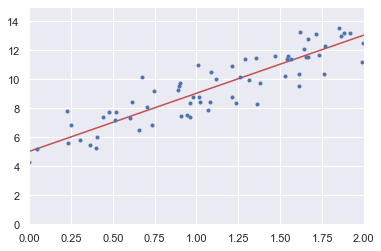

In [24]:
#lets plot the predictions
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

<h3>Computaional Complexity for Normal Equation<br/></h3>
    The Normal Equation computes the inverse of X.T*X, which is an (n + 1) × (n + 1)
matrix (where n is the number of features). The computational complexity of inverting
such a matrix is typically about <b>O(n2.4) to O(n3) (depending on the implementation)</b>.
In other words, if you double the number of features, you multiply the computation
time by roughly <b>2^2.4 = 5.3 to 2^3 = 8.
    <hr>

# LinearRegression with OLS

In [47]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [49]:
data=load_boston()
X_train,X_test,y_train,y_test=train_test_split(data.data,data.target,random_state=1)


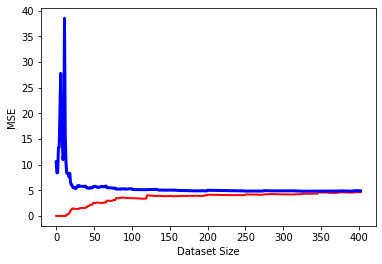

In [13]:
lr=LinearRegression()
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
   model.fit(X_train[:m], y_train[:m])
   y_train_predict = model.predict(X_train[:m])
   y_val_predict = model.predict(X_val)
   train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
   val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), "r-", linewidth=2, label="train")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
  plt.ylabel("MSE")
  
  plt.xlabel("Dataset Size")
plot_learning_curves(lr, data.data, data.target)


# Polynomial Regression

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
pr = Pipeline([
 ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
 ("lin_reg", LinearRegression()),
 ])
plot_learning_curves(pr, data.data, data.target)

In [10]:
print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.7066148459555992
0.8134720918869054


# Ridge

The hyperparameter α controls how much you want to regularize the model. If α = 0
then Ridge Regression is just Linear Regression. If α is very large, then all weights end
up very close to zero and the result is a flat line going through the data’s mean.<br/><br/>
Note that the bias term θ0
 is not regularized (the sum starts at i = 1, not 0). If we
define w as the vector of feature weights (θ1
 to θn
), then the regularization term is
simply equal to ½(∥ w ∥^2
)
, where ∥ w ∥^2
 represents the ℓ2 norm of the weight vector.12
For Gradient Descent, just add αw to the MSE gradient vector 

# To implement Ridge with closed form(Normal equation)

In [12]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(data.data, data.target)



Ridge(alpha=1, solver='cholesky')

As one would expect, the training score is higher than the test score for all dataset
sizes, for both ridge and linear regression. Because ridge is regularized, the training
score of ridge is lower than the training score for linear regression across the board.
However, the test score for ridge is better, particularly for small subsets of the data.
For less than 400 data points, linear regression is not able to learn anything. As more
and more data becomes available to the model, both models improve, and linear
regression catches up with ridge in the end. The lesson here is that with enough train‐
ing data, regularization becomes less important, and given enough data, ridge and linear regression will have the same performance (the fact that this happens here
when using the full dataset is just by chance). Another interesting aspect is the decrease in training performance for linear regression. If more data
is added, it becomes harder for a model to overfit, or memorize the data.

# Lasso

An alternative to Ridge for regularizing linear regression is Lasso. As with ridge
regression, using the lasso also restricts coefficients to be close to zero, but in a
slightly different way, called L1 regularization.8
 The consequence of L1 regularization
is that when using the lasso, some coefficients are exactly zero. This means some fea‐
tures are entirely ignored by the model. This can be seen as a form of automatic fea‐
ture selection. Having some coefficients be exactly zero often makes a model easier to
interpret, and can reveal the most important features of your model.
Let’s apply the lasso to the Boston Housing dataset:

In [15]:
from sklearn.linear_model import Lasso
import numpy as np
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))


Training set score: 0.65
Test set score: 0.66
Number of features used: 9


As you can see, Lasso does quite badly, both on the training and the test set. This
indicates that we are underfitting, and we find that it used only 4 of the 105 features.
Similarly to Ridge, the Lasso also has a regularization parameter, alpha, that controls
how strongly coefficients are pushed toward zero. In the previous example, we used
the default of alpha=1.0. To reduce underfitting, let’s try decreasing alpha. When we
do this, we also need to increase the default setting of max_iter (the maximum num‐
ber of iterations to run):

In [16]:
lasso = Lasso(alpha=.01,max_iter=10000000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.72
Test set score: 0.78
Number of features used: 13


# Elastic Net

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The
regularization term is a simple mix of both Ridge and Lasso’s regularization terms,
and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge
Regression, and when r = 1, it is equivalent to Lasso Regression

So when should you use plain Linear Regression (i.e., without any regularization),
Ridge, Lasso, or Elastic Net? It is almost always preferable to have at least a little bit of
regularization, so generally you should avoid plain Linear Regression. Ridge is a good
default, but if you suspect that only a few features are actually useful, you should pre‐
fer Lasso or Elastic Net since they tend to reduce the useless features’ weights down to
zero as we have discussed. In general, Elastic Net is preferred over Lasso since Lasso
may behave erratically when the number of features is greater than the number of
training instances or when several features are strongly correlated.

In [20]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(data.data, data.target)
elastic_net.predict(data.data)


array([30.89726433, 24.74391471, 30.37362147, 29.3502365 , 28.36352809,
       26.04689174, 23.31405798, 19.1482989 , 10.64755982, 19.03970125,
       18.53069907, 21.90713667, 21.22930111, 21.11805384, 20.35711078,
       20.89091916, 22.4162998 , 17.68797051, 17.62847545, 19.54122567,
       12.80021536, 18.39593572, 16.07577487, 14.11298804, 16.32025042,
       14.21840407, 16.37828997, 15.21199202, 20.13796624, 21.41700821,
       11.68377633, 18.73863299,  8.47564284, 14.69115914, 13.6575645 ,
       24.05664501, 22.55482289, 23.84416409, 23.54811054, 31.86716351,
       34.70492494, 28.33743036, 25.7538995 , 25.02489537, 23.01216898,
       22.20635063, 20.18969526, 17.08356899,  7.60182166, 16.9881999 ,
       21.21576771, 23.97868311, 28.07984664, 24.52516376, 15.34623444,
       31.94684836, 25.95885645, 33.60949549, 23.10098336, 21.96027906,
       18.49819328, 18.57082889, 24.67426378, 23.28154452, 23.90014143,
       30.27938462, 25.21460021, 21.05261177, 17.03184639, 20.57

# Early Stopping

In [ ]:
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
# prepare the data
poly_scaler = Pipeline([
 ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
 ("std_scaler", StandardScaler())
 ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
penalty=None, learning_rate="constant", eta0=0.0005)
minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
 sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
 y_val_predict = sgd_reg.predict(X_val_poly_scaled)
 val_error = mean_squared_error(y_val, y_val_predict)
 if val_error < minimum_val_error:
  minimum_val_error = val_error
  best_epoch = epoch
  best_model = clone(sgd_reg)


In [ ]:
print(best_model)

# Gradient Descent


<b>Equation of Partial derivatives of the cost function<br/></b>
∂MSE (θ) / ∂θj = (2 / m) ∑ (θ.T*xi− yi) xj<br/>
 <b>Gradient Descent step</b><br/>
θ(of_next_step) = θ − η∇θ MSE(θ)

In [31]:
lr = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
 gradients = 2/m * X_data.T.dot(X_data.dot(theta) - y)
 theta = theta - lr * gradients
print(theta)

[[5.02542406]
 [4.01353206]]


<b>Using Sklearn 

In [42]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor(max_iter=2000,tol=0.00001,eta0=0.01,penalty="l2")
#or
#ridge=Ridge(solver="sag")

In [43]:
sgd.fit(X,y.reshape(-1,1))

C:\Users\Ishan\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SGDRegressor(max_iter=2000, tol=1e-05)

In [44]:
sgd.intercept_, sgd.coef_


(array([4.8189446]), array([4.12133943]))